<h2>Project 1: $k$-Nearest Neighbors</h2>
<p><cite><center>So many points,<br>
some near some far,<br>
- who are my true neighbors?</center></cite></p>

<h3>Introduction</h3>

<p>In this project, you will build a $k$-nearest neighbor classifier.</p>

<strong>How to submit:</strong> You can submit your code using the red <strong>Submit</strong> button above. This button will send any code below surrounded by <strong>#&lt;GRADED&gt;</strong><strong>#&lt;/GRADED&gt;</strong> tags below to the autograder, which will then run several tests over your code. By clicking on the <strong>Details</strong> dropdown next to the Submit button, you will be able to view your submission report once the autograder has completed running. This submission report contains a summary of the tests you have failed or passed, as well as a log of any errors generated by your code when we ran it.

Note that this may take a while depending on how long your code takes to run! Once your code is submitted you may navigate away from the page as you desire -- the most recent submission report will always be available from the Details menu.

<p><strong>Evaluation:</strong> Your code will be autograded for technical
correctness and--on some assignments--speed. Please <em>do not</em> change the names of any provided functions or classes within the code, or you will wreak havoc on the autograder. Furthermore, <em>any code not surrounded by <strong>#&lt;GRADED&gt;</strong><strong>#&lt;/GRADED&gt;</strong> tags will not be run by the autograder</em>. However, the correctness of your implementation -- not the autograder's output -- will be the final judge of your score.  If necessary, we will review and grade assignments individually to ensure that you receive due credit for your work.

<p><strong>Academic Integrity:</strong> We will be checking your code against other submissions in the class for logical redundancy. If you copy someone else's code and submit it with minor changes, we will know. These cheat detectors are quite hard to fool, so please don't try. We trust you all to submit your own work only; <em>please</em> don't let us down. If you do, we will pursue the strongest consequences available to us.

<p><strong>Getting Help:</strong> You are not alone!  If you find yourself stuck  on something, contact the course staff for help.  Office hours, section, and the <a href="https://piazza.com/class/icxgflcnpra3ko">Piazza</a> are there for your support; please use them.  If you can't make our office hours, let us know and we will schedule more.  We want these projects to be rewarding and instructional, not frustrating and demoralizing.  But, we don't know when or how to help unless you ask.  



**Libraries**: Before we get started we need to install a few libraries. You can do this by executing the following code.

In [1]:
#<GRADED>
import numpy as np
from scipy.stats import mode
#</GRADED>
import sys
%matplotlib ipympl
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")
from scipy.io import loadmat
import time
from helper_functions import loaddata, visualize_knn_2D, visualize_knn_images, plotfaces, visualize_knn_boundary
import tsne_python

print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.9.7


<h3> k-Nearest Neighbors implementation in Python </h3>

<p>Our first goal towards a $k$NN classifier is to build a classifier for handwritten digits classification and face recognition. 
</p>

**Data:** We first obtain some data for testing your code. The data resides in the files <code>faces.mat</code> and <code>digits.mat</code> which hold the datasets for the further experiments.

Here, <b>xTr</b> are the training vectors with labels <b>yTr</b> and <b>xTe</b> are the testing vectors with labels <b>yTe</b>. 
As a reminder, to predict the label or class of an image in <b>xTe</b>, we will look for the <i>k</i>-nearest neighbors in <b>xTr</b> and predict a label based on their labels in <b>yTr</b>. For evaluation, we will compare these labels against the true labels provided in <b>yTe</b>.</p>

<h4> Visualizing data</h4>

Let us take a look at our data. The following script will take the first 10 training images from the face data set and visualize them.

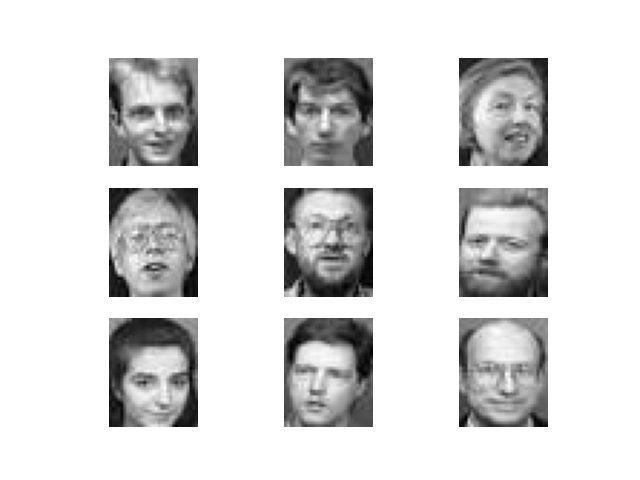

In [2]:
xTr,yTr,xTe,yTe=loaddata("faces.mat")
plt.figure()
plotfaces(xTr[:9, :])

In [3]:
print(f'Shape of Training set is {xTr.shape}')
print(f'Shape of training y set is {yTr.shape}')

Shape of Training set is (280, 1178)
Shape of training y set is (280, 1)



<h4> Implementation </h4>
<p> The following questions will ask you to finish these functions in a pre-defined order. <br></p>

<p>(a) Implement the function  <b><code>l2distance</code></b>. You may use your own code(s) from the previous project.</p>


In [4]:
#<GRADED>

def innerproduct(X,Z=None):
    '''Takes X,Z and Returns an array equal to inner product
    When X,Z are 2d arrays, it gives inner product for each row'''
    if Z is None: # case when there is only one input (X)
        Z = X
    
    inn_prod = np.dot(X, Z.T)  # first dim is the sample index
    # until here 
    return inn_prod
def l2distance(X, Z=None, p=2):
    """
    Compute all pairwise distances between vectors in X and Z.

    Parameters
    ----------
    X : np.array
        shape: (m1, d1)
    Z : np.array
        shape: (m2, d2)

    Returns
    -------
    L_2 : np.array
        A matrix L_2 of shape (m1, m2).  Each entry in L_2 i,j represents the
        distance between row i in X and row j in Z.
    """
    if Z is None:
        Z = X
        
    m1, d1 = X.shape
    m2, d2 = Z.shape
    assert (d1==d2), "Dimensions of input vectors must match!"
    # Your code goes here ..
    X_2 = (X*X).sum(axis=1).reshape((m1,1))*np.ones(shape=(1,m2))
    Z_2 = (Z*Z).sum(axis=1).reshape((1,m2))*np.ones(shape=(m1,1))
    cross = -2*innerproduct(X, Z)

    # L_2 distance
    dist_xz = np.sqrt(np.abs((X_2 + Z_2 + cross).round(decimals=6)))
    return dist_xz
    # ... until here
#</GRADED>

In [5]:
# seems to satisfy all the required properties
dist_arr = l2distance(xTr[0:8], xTe[0:2])

sidx = dist_arr.argsort(axis=0)
print(sidx, dist_arr)


[[0 7]
 [7 5]
 [1 0]
 [5 3]
 [3 2]
 [2 1]
 [4 6]
 [6 4]] [[1376.65318799 1529.47736172]
 [1468.49174325 1834.38899909]
 [1620.88062485 1534.09158788]
 [1583.21950468 1531.2527551 ]
 [1967.42013815 2095.91674453]
 [1493.51263804 1366.21703986]
 [2003.74923581 1864.43503507]
 [1384.38036681 1284.16354099]]



<p>(b) Implement the function <b><code>findknn</code></b>, which should find the $k$ nearest neighbors of a set of vectors within a given training data set. The call of 
<pre>
 [I,D]=findknn(xTr,xTe,k);
</pre> 
should result in two matrices $I$ and $D$, both of dimensions $k\times n$, where $n$ is the number of input vectors in <code>xTe</code>. The matrix $I(i,j)$ is the index of the $i^{th}$ nearest neighbor of the vector $xTe(j,:)$. 
So, for example, if we set <code>i=I(1,3)</code>, then <code>xTr(i,:)</code> is the first nearest neighbor of vector <code>xTe(3,:)</code>. The second matrix $D$ returns the corresponding distances. So $D(i,j)$ is the distance of $xTe(j,:)$ to its $i^{th}$ nearest neighbor.
</p>

In [6]:
#<GRADED>
def findknn(xTr,xTe,k, metric=l2distance, p=2):
    """
    function [indices,dists]=findknn(xTr,xTe,k);
    
    Finds the k nearest neighbors of xTe in xTr.
    
    Input:
    xTr = nxd input matrix with m row-vectors of dimensionality d
    xTe = mxd input matrix with n row-vectors of dimensionality d
    k = number of nearest neighbors to be found
    
    Output:
    indices = kxm matrix, where indices(i,j) is the i^th nearest neighbor of xTe(j,:)
    dists = Euclidean distances to the respective nearest neighbors
    """
    n = xTe.shape[0]
    # Enter your code here
    dist_array = metric(xTr, xTe, p=p)
    sidx = dist_array.argsort(axis=0)
    
    # index array
    I = np.zeros((k, n), dtype=np.int64)
    
    # array to store distance values
    D = np.zeros((k, n))
    
    for i in range(k):
        for j in range(n):
            I[i,j] = sidx[i, j]
            D[i,j] = dist_array[I[i,j], j]
    
    return [I, D]
    # until here

#</GRADED>

In [7]:
# seems to satisfy all the required properties
print(np.sqrt(np.sum((xTr[0]- xTe[0])**2)))
dist_arr = l2distance(xTr[0:8], xTe[0:2])

sidx = dist_arr.argsort(axis=0)
print(sidx, dist_arr)

findknn(xTr[0:8], xTe[0:2], 3)

1376.6531879889
[[0 7]
 [7 5]
 [1 0]
 [5 3]
 [3 2]
 [2 1]
 [4 6]
 [6 4]] [[1376.65318799 1529.47736172]
 [1468.49174325 1834.38899909]
 [1620.88062485 1534.09158788]
 [1583.21950468 1531.2527551 ]
 [1967.42013815 2095.91674453]
 [1493.51263804 1366.21703986]
 [2003.74923581 1864.43503507]
 [1384.38036681 1284.16354099]]


[array([[0, 7],
        [7, 5],
        [1, 0]]),
 array([[1376.65318799, 1284.16354099],
        [1384.38036681, 1366.21703986],
        [1468.49174325, 1529.47736172]])]

<p> The following demo samples random points in 2D. If your findknn  function is correctly implemented, you should be able to click anywhere on the plot to add a test point. The function should then draw direct connections from your test point to the k  nearest neighbors. Verify manually if your code is correct.
</p>

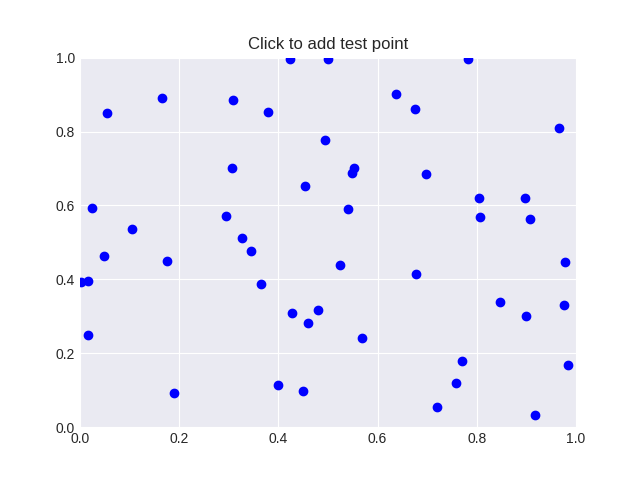

In [8]:
visualize_knn_2D(findknn)

We can visualize the k=3 nearest training neighbors of some of the test points (Click on the image to cycle through different test points). 

Click on the images above, to cycle through the test images.


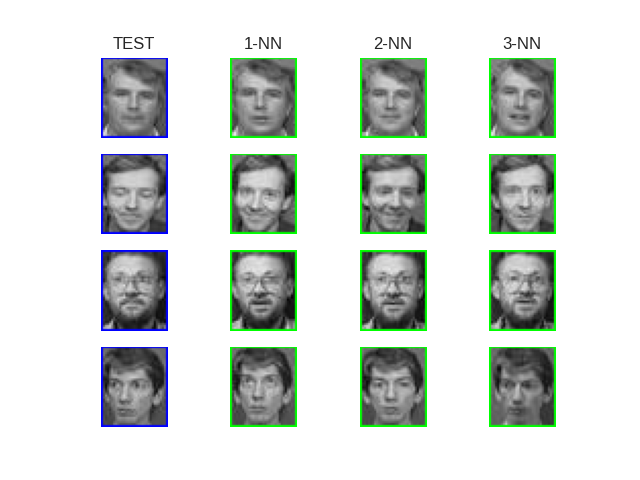

In [9]:
visualize_knn_images(findknn, imageType='faces')

<p>(c) The function <b><code>analyze</code></b> should compute various metrics to evaluate a classifier. The call of
<pre>
  result=analyze(kind,truth,preds);
</pre>
should output the <b>accuracy</b> or <b>absolute loss</b> in variable <code>result</code>. The type of output required can be specified in the input argument <code>kind</code> as <code>"abs"</code> or <code>"acc"</code>. The input variables <code>truth</code> and <code>pred</code> should contain vectors of true and predicted labels respectively.
For example, the call
<pre>
>> analyze('acc',[1 2 1 2],[1 2 1 1])
</pre>
should return an accuracy of 0.75. Here, the true labels are 1,2,1,2 and the predicted labels are 1,2,1,1. So the first three examples are classified correctly, and the last one is wrong --- 75% accuracy.
</p>



In [10]:
#<GRADED>
def analyze(kind,truth,preds):
    """
    function output=analyze(kind,truth,preds)         
    Analyses the accuracy of a prediction
    Input:
    kind='acc' classification error
    kind='abs' mean absolute loss
    (other values of 'kind' will follow later)
    """
    truth = np.array(truth).flatten()
    preds = np.array(preds).flatten()
    if kind == 'acc':
        result = np.sum(truth == preds) / np.size(truth)

    elif kind == 'abs':  
        # mean absolute loss
        result = np.sum(np.abs(truth - preds)) / np.size(truth)
        
    return result
#</GRADED>

In [11]:
print(np.array([11,1,1,1,0])[:-1])
analyze('abs',[1, 2, 1, 2],[1, 2, 1, 1])

[11  1  1  1]


0.25


<p>(e) Implement the function <b><code>knnclassifier</code></b>, which should perform $k$ nearest neighbor classification on a given test data set. The call <pre>preds=knnclassifier(xTr,yTr,xTe,k)</pre>
should output the predictions for the data in <code>xTe</code> i.e. <code>preds[i]</code> will contain the prediction for <code>xTe[i,:]</code>.</p>

In [12]:
#<GRADED>
        
def knnclassifier(xTr, yTr, xTe, k, metric=l2distance, p=2):
    """
    Gives prediction of xTe data based on kNN method

    Parameters
    ----------
    xTr : np.array
        shape: (m1, d1)  m1: number of train data points
    yTr : np.array
        shape: (m1, 1)
    xTe : np.array
        shape: (m3, d3)
    k : parameter k in kNN, m3: number of test data points

    Returns
    -------
    preds : np.array
        Class Prediction of xTe
        shape: (m3, 1)
    """
    
    y_flat = yTr
    # find k nearest nghs
    [I,D] = findknn(xTr, xTe, k, metric, p)    
    
    def find_freq(x):

        most_freq = np.bincount(x).argmax()
        x_prime = x[x != most_freq]

        #print(f'\n here is arr: {x} and {x_prime}\n')
        if len(x_prime) != 0:
            second_m_freq = np.bincount(x_prime).argmax()
            if np.sum(x == most_freq) == np.sum( x == second_m_freq):
                # lower k -> k-1, if there is a tie
                return find_freq(x[:-1])

            else:
                return most_freq
        else:
            return most_freq
    
    # predictions
    # bincount finds the frequency for 1d array
    # apply_along_axis, applies the lambda function across 0th dimension
    # i.e. dim of neares nghs
    preds = np.apply_along_axis(find_freq, 0, y_flat[I])

    return preds
#</GRADED>

In [13]:
def find_freq(x):

    most_freq = np.bincount(x).argmax()
    x_prime = x[x != most_freq]

    print(f'\n here is arr: {x} and {x_prime}\n')
    if len(x_prime) != 0:
        second_m_freq = np.bincount(x_prime).argmax()
        if np.sum(x == most_freq) == np.sum( x == second_m_freq):
            # lower k -> k-1, if there is a tie
            return find_freq(x[:-1])
        
        else:
            return most_freq
    else:
        return most_freq
    
print(find_freq(np.array([3,2,3,3,2,4,2,4])))


 here is arr: [3 2 3 3 2 4 2 4] and [3 3 3 4 4]


 here is arr: [3 2 3 3 2 4 2] and [3 3 3 4]


 here is arr: [3 2 3 3 2 4] and [2 2 4]

3


In [14]:
k = 5
preds=knnclassifier(xTr,yTr,xTe,k)
preds.flatten()

array([15,  3, 14, 29,  4, 18,  5, 33, 13,  5,  2,  6,  4, 34, 33, 36, 31,
       12, 24, 25,  6,  5, 16,  5,  3, 14,  9,  1, 29, 18,  8, 33, 21,  3,
       39, 32, 22, 26,  3,  7, 22, 35, 37,  4, 10, 13, 19, 25, 28, 28, 37,
       20, 19,  6, 14, 19,  9, 16, 11, 26, 35,  5, 32, 16, 24,  5, 30,  8,
       27, 16, 38, 15,  2, 37, 36, 23, 18, 22, 38,  7, 23, 12, 32, 13, 11,
        3, 16, 38,  2, 10, 25, 12, 29, 27, 26, 39,  7, 30, 34, 15, 27, 25,
       10, 11, 30, 21, 31, 36, 17, 24,  8, 22, 38, 34, 28, 30, 38, 21, 31,
        9])

In [15]:
# sanity checks
print(f'shap of the output is {preds.shape}')
print(f'manually checking the result' )
[I,D] = findknn(xTr, xTe, k)
print(f'first points neares nghs are \n {yTr[I[:,0]]}')
print(f'fifth points neares nghs are \n {yTr[I[:,4]]}')

shap of the output is (120, 1)
manually checking the result
first points neares nghs are 
 [[15]
 [15]
 [15]
 [30]
 [ 5]]
fifth points neares nghs are 
 [[4]
 [4]
 [4]
 [4]
 [4]]


<p>You can compute the actual classification error on the test set by calling
<pre>
>> analyze("acc",yTe,knnclassifier(xTr,yTr,xTe,3))
</pre></p>

<p>(e) This script runs the $k$-nearest neighbor classifier over the faces and digits data set. The faces data set has $40$ classes, the digits data set $10$. What classification accuracy would you expect from a random classifier?</p>

In [16]:
# load the data
xTr,yTr,xTe,yTe=loaddata("faces.mat")

for k in [1, 2, 3, 6, 9]:
    print(f'Face Recognition: ({k}-NN)')
    
    t0 = time.time()
    preds = knnclassifier(xTr, yTr, xTe, k=k)
    result=analyze("acc", yTe, preds)
    t1 = time.time()
    print(f'You obtained {result*100.0:.2f} classification acccuracy in {t1-t0:.4f} seconds\n')

Face Recognition: (1-NN)
You obtained 95.83 classification acccuracy in 0.0178 seconds

Face Recognition: (2-NN)
You obtained 95.83 classification acccuracy in 0.0176 seconds

Face Recognition: (3-NN)
You obtained 91.67 classification acccuracy in 0.0195 seconds

Face Recognition: (6-NN)
You obtained 87.50 classification acccuracy in 0.0245 seconds

Face Recognition: (9-NN)
You obtained 80.00 classification acccuracy in 0.0275 seconds



In [17]:
# load the data
xTr,yTr,xTe,yTe=loaddata("digits.mat")

for k in [1, 2, 3, 6, 9]:
    print(f'Digit Recognition: ({k}-NN)')
    
    t0 = time.time()
    preds = knnclassifier(xTr, yTr, xTe, k=k)
    result=analyze("acc", yTe, preds)
    t1 = time.time()
    print(f'You obtained {result*100.0:.2f} classification acccuracy in {t1-t0:.4f} seconds\n')

Digit Recognition: (1-NN)
You obtained 95.02 classification acccuracy in 4.8616 seconds

Digit Recognition: (2-NN)
You obtained 95.02 classification acccuracy in 4.8179 seconds

Digit Recognition: (3-NN)
You obtained 94.97 classification acccuracy in 4.5286 seconds

Digit Recognition: (6-NN)
You obtained 94.97 classification acccuracy in 4.5010 seconds

Digit Recognition: (9-NN)
You obtained 94.42 classification acccuracy in 4.4572 seconds



#### KNN Boundary Visualization
To help give you a visual understanding of how the KNN boundary is affected by $k$ and the specific dataset, feel free to play around with the visualization below. Click anywhere in the graph to add a negative class point. Hold down 'p' and click anywhere to add a positive class point. To increase $k$ hold down 'h' and click anywhere.

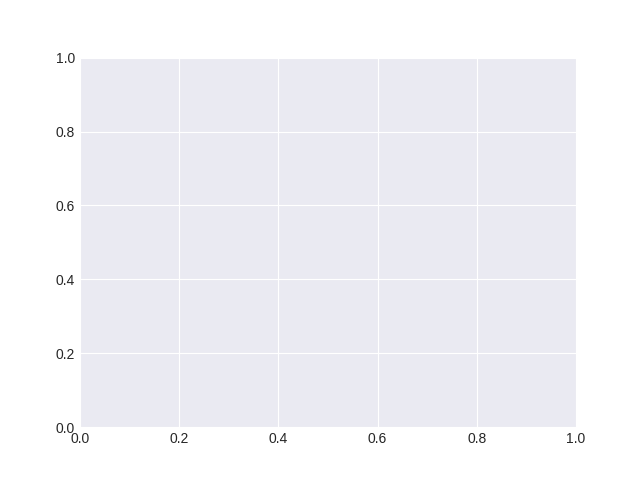

In [18]:
visualize_knn_boundary(knnclassifier)

<p>(f) (optional) Sometimes a $k$-NN classifier can result in a draw, when the majority vote is not clearly defined. Can you improve your accuracy by falling back onto $k$-NN with lower $k$ in such a case?</p>

<p>(g) Edit the function <b><code>competition</code></b>, which reads in a training and testing set and makes predictions. Inside this function you are free to use any combination or variation of the k-nearest neighbor classifier. Can you beat my submission on our secret training and testing set? </p>

<h4>Evaluation</h4>
<p>For this project, you will be ranked on the following measures:
<ul>
<li>Percentage of test cases passed</li>
<li>Average of:
<ul>
  <li>Accuracy on the faces test dataset and</li>
  <li>Accuracy on the digits test dataset</li>
  <li>Accuracy on the <i>secret</i> test dataset</li>
</ul>
</ul>

</p>

Let's take a look at the competition data. We will use plotdata function to visualize the first 10 training images from the digit data set and visualize them. Click on images to cycle through the competition data.

Click on the images above, to cycle through the test images.


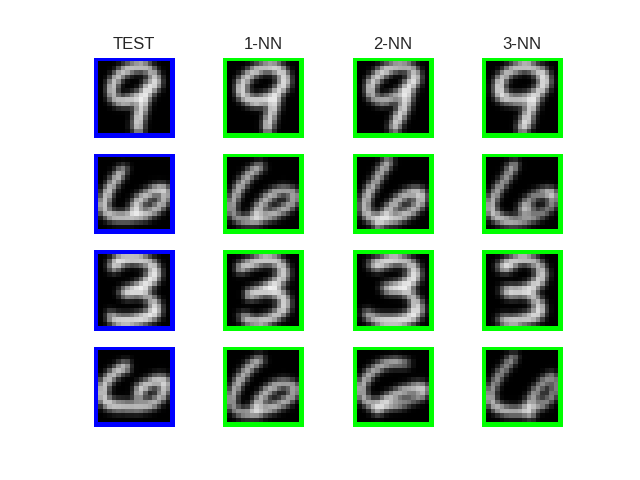

In [19]:
visualize_knn_images(findknn, imageType='digits')

In [20]:
from sklearn.model_selection import train_test_split

#<GRADED>
def competition(xTr, yTr, xTe):
    """
    Gives the best prediction of xTe data based on kNN method possible by choosing optimal
    value parameter k
    
    Strategy: find the optimal value for k by validation. 
    Then give prediction for model on training + validation data set.

    Parameters
    ----------
    xTr : np.array
        shape: (m1, d1)  m1: number of train data points
    yTr : np.array
        shape: (m1, 1)
    xTe : np.array
        shape: (m3, d3)

    Returns
    -------
    preds : np.array
        Class Prediction of xTe
        shape: (m3, 1)
    """
    # training /validation split
    X_train, X_val, y_train, y_val = \
                        train_test_split(xTr, yTr, test_size=0.2, random_state=34)

    k_range = [1,2,3,4,5]
    
    k_max = k_range[0]
    result_max = 0
    
    for k in k_range:
        print(f'Digit Recognition: ({k}-NN)')

        t0 = time.time()
        preds = knnclassifier(X_train, y_train, X_val, k=k)
        result=analyze("acc", y_val, preds)
        t1 = time.time()
        
        if result > result_max:
            k_max = k
            result_max = result
        print(f'You obtained {result*100.0:.2f} classification acccuracy for validation data in {t1-t0:.4f} seconds\n')
    
    
    # prediction of original test data using entire original training data
    preds = knnclassifier(xTr, yTr, xTe, k=k_max)
    return preds
  
#</GRADED>

In [35]:
# load the data
xTr,yTr,xTe,yTe=loaddata("digits.mat")
preds = competition(xTr, yTr, xTe)

result = analyze("acc", yTe, preds)

print(result)

Digit Recognition: (1-NN)
You obtained 97.46 classification acccuracy for validation data in 2.3445 seconds

Digit Recognition: (2-NN)
You obtained 97.46 classification acccuracy for validation data in 2.2755 seconds

Digit Recognition: (3-NN)
You obtained 97.88 classification acccuracy for validation data in 2.3597 seconds

Digit Recognition: (4-NN)
You obtained 97.88 classification acccuracy for validation data in 2.3383 seconds

Digit Recognition: (5-NN)
You obtained 97.74 classification acccuracy for validation data in 2.3178 seconds

0.9496761335326358


In [22]:
# load the data
xTr,yTr,xTe,yTe=loaddata("faces.mat")
preds = competition(xTr, yTr, xTe)

result = analyze("acc", yTe, preds)

print(result)

Digit Recognition: (1-NN)
You obtained 92.86 classification acccuracy for validation data in 0.0079 seconds

Digit Recognition: (2-NN)
You obtained 92.86 classification acccuracy for validation data in 0.0082 seconds

Digit Recognition: (3-NN)
You obtained 87.50 classification acccuracy for validation data in 0.0097 seconds

Digit Recognition: (4-NN)
You obtained 83.93 classification acccuracy for validation data in 0.0099 seconds

Digit Recognition: (5-NN)
You obtained 76.79 classification acccuracy for validation data in 0.0099 seconds

0.9583333333333334


The best accuracies for test data are so far
- 94.97 % for digit recognition
- 95.93 % for face recognition

### Further improvements
    Now we try different metrics and do data augmentation to improve our current accuracies

In [23]:
def lpdistance(X, Z=None, p=2):
    """
    Compute all pairwise lp distances between vectors in X and Z.
    This will be different from l2 distance in that we cannot use inner products np.dot
    since lp distance cannot be construcuted out of an inner product.
    Since we wont use vectorization of numpy, this will be slower than l2distance implemented
    above

    Parameters
    ----------
    X : np.array
        shape: (m1, d1)
    Z : np.array
        shape: (m2, d2)

    Returns
    -------
    L_p : np.array
        A matrix L_p of shape (m1, m2).  Each entry in L_p i,j represents the
        distance between row i in X and row j in Z.
    """
    if Z is None:
        Z = X
        
    m1, d1 = X.shape
    m2, d2 = Z.shape
    assert (d1==d2), "Dimensions of input vectors must match!"
    
    L_p = np.zeros((m1, m2))
    
    for i in range(m1):
        for j in range(m2):
            dist = np.sum(((np.abs(X[i] - Z[j]))**p).round(decimals=7))
            L_p[i,j] = np.power(dist, 1/p)

    return L_p
    # ... until here
#</GRADED>

In [24]:
# checks
x1 = np.ones((1,5))
x2 = np.array([[1,1,1,4,3]])
for p in [1,2,3,4,5,6,7,8,9]:
    print(lpdistance(x1, x2, p))

[[5.]]
[[3.60555128]]
[[3.27106631]]
[[3.13828899]]
[[3.07515166]]
[[3.04237118]]
[[3.024476]]
[[3.01438807]]
[[3.00857213]]


It also converges to l_inft norm as it should

In [27]:
xTr.shape

(7291, 50)

In [38]:
# load the data
xTr,yTr,xTe,yTe=loaddata("digits.mat")
print(f'Before pca dim of xTr are: {xTr.shape}')
xTr = tsne_python.pca(xTr, no_dims=256)
print(f'After pca dim of xTr are: {xTr.shape}')
#xTe = tsne_python.pca(xTe, no_dims=256)
preds = competition(xTr, yTr, xTe)

result = analyze("acc", yTe, preds)

print(result)

Before pca dim of xTr are: (7291, 256)
Preprocessing the data using PCA...
After pca dim of xTr are: (7291, 256)
Digit Recognition: (1-NN)
You obtained 97.46 classification acccuracy for validation data in 2.3187 seconds

Digit Recognition: (2-NN)
You obtained 97.46 classification acccuracy for validation data in 2.2962 seconds

Digit Recognition: (3-NN)
You obtained 97.88 classification acccuracy for validation data in 2.2699 seconds

Digit Recognition: (4-NN)
You obtained 97.88 classification acccuracy for validation data in 2.3151 seconds

Digit Recognition: (5-NN)
You obtained 97.74 classification acccuracy for validation data in 2.3175 seconds

0.07075236671649228


In [39]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'